In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Declare where are the files to load, then read them as CSV and merge them (using the "Mouse ID")
mouse_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_data = pd.read_csv("data/clinicaltrial_data.csv")
tutti_data = pd.merge(mouse_data, clinical_data, how="outer", on="Mouse ID" )

# General exploration of the data
#tutti_data.info()
#tutti_data.describe()
tutti_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [3]:
# Second version, with Timepoint as "object" instead of integer
# Declare where are the files to load, then read them as CSV and merge them (using the "Mouse ID")
mouse_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_data = pd.read_csv("data/clinicaltrial_data.csv")
tutti_data_v2 = pd.merge(mouse_data, clinical_data, how="outer", on="Mouse ID" )

# Adjusting Timepoints as objects, instead of integers (if needed)
tutti_data_v2["Timepoint"] = tutti_data_v2["Timepoint"].astype("object")

# General exploration of the data
#tutti_data_v2.info()
#tutti_data.dtypes
#tutti_data_v2.head()

# Third version, setting the 'Mouse ID' to be our index for easy referencing of rows
tutti_data_reindex = tutti_data.set_index("Mouse ID")
#tutti_data_reindex.head()

In [4]:
# With original data (no re-index, no timepoint as object)
# Store the variable requested (e.g., Mean Tumor Volume) Grouped by Drug and Timepoint 
g_by_d_and_t = tutti_data.groupby(["Drug", "Timepoint"])
mtv = g_by_d_and_t["Tumor Volume (mm3)"].mean()
mms = g_by_d_and_t["Metastatic Sites"].mean()
n_mice = g_by_d_and_t["Mouse ID"].nunique()
mtv_se = g_by_d_and_t["Tumor Volume (mm3)"].sem()
mms_se = g_by_d_and_t["Metastatic Sites"].sem()

# Convert to DataFrames
mtv_by_drug_time_df = pd.DataFrame({"Mean Tumor Volume (mm3)" : mtv})
mms_by_drug_time_df = pd.DataFrame({"Mean Metastatic Sites" : mms})
nmice_by_drug_time_df = pd.DataFrame({"Mouse Count" : n_mice})

# Task 1. Tumor Response to Treatment
# Task 1.1 Preview DataFrame
mtv_by_drug_time_df.head()

Mean Tumor Volume (mm3)
Drug      Timepoint                         
Capomulin 0                        45.000000
          5                        44.266086
          10                       43.084291
          15                       42.064317
          20                       40.716325

In [5]:
# Task 1.2 Store the Standard Error of WHATEVER Grouped by Drug and Timepoint
se_mtv_by_drug_time_df = pd.DataFrame({"Tumor Volume Standard Error": mtv_se})
se_mms_by_drug_time_df = pd.DataFrame({"Metastatic Sites Standard Error" : mms_se})

# Task 1.2 Preview
se_mtv_by_drug_time_df.head()

Tumor Volume Standard Error
Drug      Timepoint                             
Capomulin 0                             0.000000
          5                             0.448593
          10                            0.702684
          15                            0.838617
          20                            0.909731

In [6]:
# 1.3 Minor Data Munging to Re-Format the Data Frames
# Using Pivot_table, then rearange the columns
munging_mtv = pd.pivot_table(mtv_by_drug_time_df,values="Mean Tumor Volume (mm3)", index="Timepoint", columns="Drug")
munging_se_mtv = pd.pivot_table(se_mtv_by_drug_time_df,values="Tumor Volume Standard Error", index="Timepoint", columns="Drug")

# 1.3 Preview of reformatted work
munging_mtv.head()
#munging_se_mtv.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [7]:
# 1.3 Variation of Minor Data Munging to Re-Format the Data Frames
# Using Pivot_table, then rearange the columns
py_mtv = pd.pivot_table(mtv_by_drug_time_df,values="Mean Tumor Volume (mm3)", index="Drug", columns="Timepoint")
py_se_mtv = pd.pivot_table(se_mtv_by_drug_time_df,values="Tumor Volume Standard Error", index="Drug", columns="Timepoint")

# 1.3 Preview of reformatte worked
py_mtv.head()
#py_se_mtv.head()

Timepoint,0,5,10,15,20,25,30,35,40,45
Drug,,,,,,,,,,
Capomulin,45.0,44.266086,43.084291,42.064317,40.716325,39.939528,38.769339,37.816839,36.958001,36.236114
Ceftamin,45.0,46.503051,48.285125,50.094055,52.157049,54.287674,56.769517,58.827548,61.467895,64.132421
Infubinol,45.0,47.062001,49.403909,51.296397,53.197691,55.715252,58.299397,60.742461,63.162824,65.755562
Ketapril,45.0,47.389175,49.582269,52.399974,54.920935,57.678982,60.994507,63.371686,66.068580,70.662958
Naftisol,45.0,46.796098,48.694210,50.933018,53.644087,56.731968,59.559509,62.685087,65.600754,69.265506


In [8]:
# Collect whatever data, then you will be able to collect the name of columns
mean_whatever = py_mtv.mean()

# Collect the timepoints where data was collected
timepoints = mean_whatever.keys()
print(timepoints)

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')


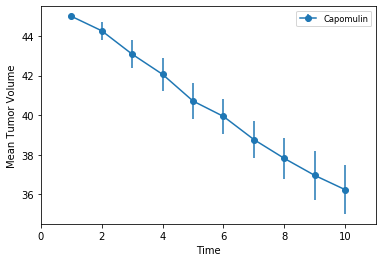

In [14]:
# THIS KIND OF WORK, BUT NOT YET. 1.4 # Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
ax.errorbar(np.arange(0, len(munging_se_mtv), 1)+1, munging_mtv["Capomulin"], marker="o", yerr=munging_se_mtv["Capomulin"], label="Capomulin")
ax.set_xlim(0, len(munging_mtv)+1)
ax.set_xlabel("Time")
ax.set_ylabel("Mean Tumor Volume")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()

In [15]:
# THIS KIND OF WORK, BUT NOT YET. 1.4 # Generate the Plot (with Error Bars)
plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, squeeze=True, subplot_kw=None, gridspec_kw=None)
fig, ax = 
ax.errorbar(np.arange(0, len(munging_se_mtv), 1)+1, munging_mtv["Capomulin"], marker="o", yerr=munging_se_mtv["Capomulin"], label="Capomulin")
ax.set_xlim(0, len(munging_mtv)+1)
ax.set_xlabel("Time")
ax.set_ylabel("Mean Tumor Volume")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()

SyntaxError: invalid syntax (<ipython-input-15-9045169cbd04>, line 3)

In [ ]:
# Scatter plot based upon the above data
plt.scatter(munging_mtv["Timepoint"], munging_mtv["Capomulin"], marker="o", facecolors="red", edgecolors="red")
#Drug	Timepoint	Tumor Volume (mm3)
plt.title("Capomulin")
plt.xlabel("Time")
plt.ylabel("Tumor Volume over time")

In [ ]:
# Generate the plot data for each drug 
means = [tutti_data["Drug"].mean() for Drug in vehicle_sample_set]
standard_errors = [sem(sample.Combined_MPG) for sample in vehicle_sample_set]
x_axis = np.arange(0, len(vehicle_sample_set), 1) + 1

In [ ]:
# Generate the plot data for each sample 
means = [py_mtv.Combined_MPG.mean() for sample in vehicle_sample_set]
standard_errors = [sem(sample.Combined_MPG) for sample in vehicle_sample_set]
x_axis = np.arange(0, len(vehicle_sample_set), 1) + 1

In [ ]:
# Reset index
r_munging_mtv = munging_mtv.reset_index()
#r_munging_mtv

r_munging_se_mtv = munging_se_mtv.reset_index()
#r_munging_se_mtv

# Kind of variable "timepoint" is here?
#r_munging_mtv.dtypes
#r_munging_se_mtv.dtypes

In [ ]:
# Scatter plot based upon the above data
capomulin_mtv, = plt.plot(r_munging_mtv["Timepoint"], r_munging_mtv["Capomulin"], marker="o", color="red", label="Capomulin")
ceftamin_mtv, = plt.plot(r_munging_mtv["Timepoint"], r_munging_mtv["Ceftamin"], marker="^", color="blue", label="Ceftamin")

# Create a legend for our chart
plt.legend(handles=[capomulin_mtv, ceftamin_mtv], loc="best")

# Show the chart
plt.show()

In [ ]:
# Task 1. Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
    # Formatting: You must use proper labeling of your plots, including aspects like: 
    # Formatting: Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.
    # Formatting: Your scatter plots must include error bars.
   

In [ ]:
# With Re-index
# Store the variable requested (e.g., Mean Tumor Volume) Grouped by Drug and Timepoint 
g_by_d_and_t = tutti_data_reindex.groupby(["Drug"])
mtv = g_by_d_and_t["Tumor Volume (mm3)"].mean()
mms = g_by_d_and_t["Metastatic Sites"].mean()
n_mice = g_by_d_and_t["Mouse ID"].nunique()
mtv_se = g_by_d_and_t["Tumor Volume (mm3)"].sem()
mms_se = g_by_d_and_t["Metastatic Sites"].sem()

# Convert to DataFrames
mtv_by_drug_time_df = pd.DataFrame({"Mean Tumor Volume (mm3)" : mtv})
mms_by_drug_time_df = pd.DataFrame({"Mean Metastatic Sites" : mms})
nmice_by_drug_time_df = pd.DataFrame({"Mouse Count" : n_mice})

# Task 1. Tumor Response to Treatment
# Task 1.1 Preview DataFrame
mtv_by_drug_time_df

In [ ]:
# Merge our two data frames together
combined_mtv_data = pd.merge(munging_mtv, munging_se_mtv, on="Timepoint")
combined_mtv_data.head()

In [ ]:
# Rename columns
combined_mtv_data = combined_mtv_data.rename(columns={"Capomulin_x":"Capomulin_mean", "Ceftamin_x":"Ceftamin_mean",
                                                      "Infubinol_x":"Infubinol_mean", "Ketapril_x": "Ketapril_mean",
                                                      "Naftisol_x":"Naftisol_mean", "Placebo_x": "Pacebo_mean",
                                                      "Propriva_x": "Propriva_mean", "Ramicane_x": "Ramicane_mean",
                                                      "Stelasyn_x": "Stelasyn_mean", "Zoniferol_x":"Zoniferol_mean", 
                                                      "Capomulin_y":"Capomulin_SE", "Ceftamin_y":"Ceftamin_SE",
                                                      "Infubinol_y":"Infubinol_SE", "Ketapril_y": "Ketapril_SE",
                                                      "Naftisol_y":"Naftisol_SE", "Placebo_y": "Pacebo_SE",
                                                      "Propriva_y": "Propriva_SE", "Ramicane_y": "Ramicane_SE",
                                                      "Stelasyn_y": "Stelasyn_SE", "Zoniferol_y":"Zoniferol_SE"})
# Print
combined_mtv_data.head()

In [ ]:
# Create a scatter plot which compares timepoint to Drug_mean
combined_mtv_data.plot(kind="scatter", x="Timepoint", y="Capomulin_mean", grid=True, figsize=(8,8),
              title="Mean Tumor Volume over Time")
plt.show()

In [ ]:
# Create a scatter plot which compares timepoint to Drug_mean
combined_mtv_data.plot(kind="scatter", x="Timepoint", y="Capomulin_mean", grid=True, figsize=(8,8),
              title="Mean Tumor Volume over Time")
plt.show()

In [ ]:
# 1.4 Generate the BoxPlot (with Error Bars)

In [ ]:



#ax.errorbar(munging_se_mtv, munging_mtv["Capomulin"], yerr=munging_se_mtv["Capomulin"], label="Mean of Tumor Volume")
#ax.set_xlim(0, len(munging_mtv)+1)
#ax.set_xlabel("Time")
#ax.set_ylabel("Mean Tumor Volume")
#plt.legend(loc="best", fontsize="small", fancybox=True)

#x = munging_mtv["Capomulin"]
#y = munging_se_mtv["Capomulin"]
#yerr = np.linspace(0.05, 0.2, 10)

fig, ax = plt.subplots()
plt.scatter(mtv_by_drug_time_df, munging_mtv, marker="o", facecolors="red", edgecolors="black")
x = munging_mtv["Capomulin"]
y = munging_se_mtv["Capomulin"]
yerr = np.linspace(0.05, 0.2, 10)
plt.errorbar(x, y, yerr=yerr, uplims=True, lolims=True, label="This option")
#fig, ax = plt.subplots()
#ax.errorbar(munging_se_mtv, munging_mtv, label="Mean of Tumor Volume")

# Show the Figure
plt.show()


#fig = plt.figure()
#x = np.arange(10)
#y = 2.5 * np.sin(x / 20 * np.pi)
#yerr = np.linspace(0.05, 0.2, 10)
#plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')
#plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')
#plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True, label="This option")
#upperlimits = [True, False] * 5
#lowerlimits = [False, True] * 5
#plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,label='subsets of uplims and lolims')




#plt.ylim(180,620)
#plt.xlim(11,26)
#plt.title("Ice Cream Sales v Temperature")
#plt.xlabel("Temperature (Celsius)")
#plt.ylabel("Sales (Dollars)")


# THIS KIND OF WORK, BUT NOT YET. 1.4 # Generate the Plot (with Error Bars)
#fig, ax = plt.subplots()
#ax.errorbar(np.arange(0, len(munging_se_mtv), 1)+1, munging_mtv["Capomulin"], yerr=munging_se_mtv["Capomulin"], label="Mean of Tumor Volume")
#ax.set_xlim(0, len(munging_mtv)+1)
#ax.set_xlabel("Time")
#ax.set_ylabel("Mean Tumor Volume")
#plt.legend(loc="best", fontsize="small", fancybox=True)
#plt.show()


# Save the Figure



In [ ]:
# 1.4 # Generate the Plot (with Error Bars)
#fig, ax = plt.subplots()
#ax.errorbar(np.arange(0, len(mtv_by_drug_time_df), 1)+1, means, yerr=munging_se_mtv, fmt="o", color="r", alpha=0.5, label="Mean of Whatever")
#ax.set_xlim(0, len(means)+1)
#ax.set_xlabel("Time")
#ax.set_ylabel("Mean Tumor Volume")
#plt.legend(loc="best", fontsize="small", fancybox=True)
#plt.show()

# Save the Figure

# Show the Figure

In [ ]:
# Task 2. Metastatic Response to Treatment
# Task 2.1 Preview DataFrame
mms_by_drug_time_df

In [ ]:
# Task 2.2 Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrames
# Preview DataFrame
se_mms_by_drug_time_df

In [ ]:
# 2.3 Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
# Using Pivot_table, then rearange the columns and print
munging_mms = pd.pivot_table(mms_by_drug_time_df,values="Mean Metastatic Sites", index="Timepoint", columns="Drug")
munging_mms.head()

In [ ]:
# Task 3. Survival Rates
# Task 3.1 Preview DataFrame
nmice_by_drug_time_df

In [ ]:
# This step is not needed for the Survival activity

# Convert to DataFrames

# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

# Preview DataFrame

In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure
#plt.show()

In [ ]:
# Make a variable called "drug_name" and store a "drug" in it
#drug_name = "SEA00001"
# (Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Placebo, Propriva, Ramicane, Stelasyn, Zoniferol)

# Collect the trips of the 'bikeid' above
#just_capo = sum_it_up.loc[bike_id]

# Place the gender keys for that single bike into a list
#gender_list = just_capo.keys()

In [ ]:
# Task 1. Trying different options

# Set line
#(slope, intercept, _, _, _) = linregress(x_axis, fake)
#fit = slope * x_axis + intercept

# Plot data
#fig, ax = plt.subplots()

#fig.suptitle("Fake Banana Data!", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)

#ax.set_xlabel("Fake Banana Ages (in days)")
#ax.set_ylabel("Fake Banana Weights (in Hundres of Kilograms)")

#ax.plot(x_axis, fake, linewidth=0, marker='o')
#ax.plot(x_axis, fit, 'b--')

#plt.show()

In [ ]:
# Task 2. Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites 
# changes over time for each treatment.
    # Formatting: You must use proper labeling of your plots, including aspects like: 
    # Formatting: Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.
    # Formatting: Your scatter plots must include error bars.

In [ ]:
# Task 3. Creating a scatter plot that shows the number of mice still alive 
# through the course of treatment (Survival Rate)
    # Formatting: You must use proper labeling of your plots, including aspects like: 
    # Formatting: Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.
    # Formatting: Your scatter plots must include error bars.


In [ ]:
# Task 4. Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
    # Formatting: Titles, Axes Labels, Legend Labels, etc.
    # Formatting: Your bar graph should indicate tumor growth as red and tumor reduction as green.
    # Formatting: It should also include a label with the percentage change for each bar. 


In [ ]:
# Task 5. Include 3 observations about the results of the study. Use the visualizations you generated 
# from the study data as the basis for your observations.

In [ ]:
# Generate groups by treatments 
# (Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Placebo, Propriva, Ramicane, Stelasyn, Zoniferol)
 
# Using GroupBy in order to organize the data into fields according to "Drugs/Treatments"
#capo_df = tutti_data.groupby(["Drug"])
# In order to be visualized, a data function must be used
# The numeric variables can be now calculated per drug
#school_average_math = grouped_schools_df["math_score"].mean()
# Average Reading Score
#school_average_reading = grouped_schools_df["reading_score"].mean()
# Looking for the ones that pass math per school
#pass_math_per_school = pass_math_df.groupby(["school_name"])
# In order to get the percentage passing math
#perc_pass_math = (pass_math_per_school["Student ID"].count() / grouped_schools_df["Student ID"].count())*100
# Looking for the ones that pass reading per school
#pass_reading_per_school = pass_reading_df.groupby(["school_name"])
# In order to get the percentage passing reading
#perc_pass_reading = (pass_reading_per_school["Student ID"].count()/grouped_schools_df["Student ID"].count())*100
# Overall Passing Rate (Average of math and reading)
#perc_overall_passing = (perc_pass_math+perc_pass_reading)/2
# Create a school summary for future calculations (tasks 7 and onward), but a formatted version for tasks 2,3 and 4.
#school_summary = pd.DataFrame({"Total Students" : total_students, 
#                               "Total School Budget" : budget_per_school,
#                               "Per Student Budget" : budget_per_student,
#                               "Average Math Score" : school_average_math,
#                               "Average Reading Score" : school_average_reading,
#                               "% Passing Math" : perc_pass_math,
#                               "% Passing Reading" : perc_pass_reading,
#                               "Overall Passing Rate" : perc_overall_passing})
# Now, print to make sure all OK 
#school_summary_f